# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s

        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## 데이터 생성 및 회귀식 설정

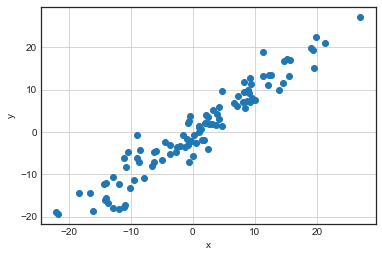

In [5]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## 신경망 구성

In [44]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

## 모델 생성 및 파라미터 확인

In [45]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [46]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


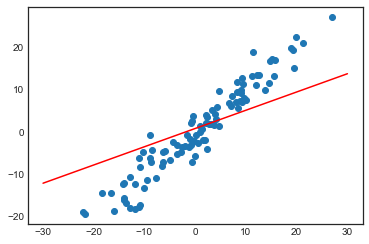

In [47]:
w, b = model.parameters()
def get_params():
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

plot_fit('Initial Model')

## 손실함수와 옵티마이저

In [48]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [49]:
epochs = 100
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    
    loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch: {:3d}\tloss: {:.4f}'.format(epoch+1, loss))

Epoch:   1	loss: 43.3702
Epoch:  11	loss: 9.8352
Epoch:  21	loss: 9.5465
Epoch:  31	loss: 9.5103
Epoch:  41	loss: 9.4773
Epoch:  51	loss: 9.4456
Epoch:  61	loss: 9.4152
Epoch:  71	loss: 9.3859
Epoch:  81	loss: 9.3578
Epoch:  91	loss: 9.3308


## 시각화

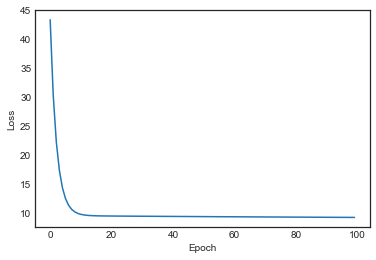

In [54]:
plt.plot(range(epochs), torch.Tensor(losses))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

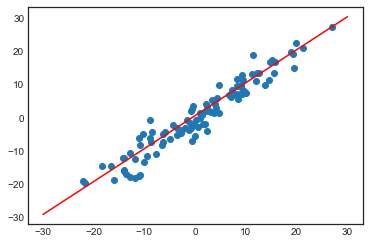

In [53]:
plot_fit("Trained Model")